In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [3]:
def parse_tables(file_path):
    """
    Parses the tables from the given file into a dictionary of pandas DataFrames.

    Args:
        file_path (str): Path to the file containing the tables.

    Returns:
        dict: A dictionary where the keys are table names and the values are DataFrames.
    """
    
    with open(file_path, 'r') as file:
        # Read the entire content of the file
        content = file.read()

    # Split the content by double newlines to separate the tables
    tables = content.strip().split('\n\n')

    # Initialize a dictionary to store DataFrames with table names as keys
    tables_dict = {}

    for table in tables:
        # Split the table content by lines
        lines = table.strip().split('\n')

        # Extract the table name from the first line
        table_name = lines[0].strip()

        # Extract the Hz information (metadata) from the second line
        hz = lines[1].strip()

        # Parse the column headers and units from the next three lines
        group_headers = lines[2].split(',')  # Group headers (first row)
        column_headers = lines[3].split(',')  # Column names (second row)
        units = lines[4].split(',')  # Units (third row)

        # Create a list to hold the full column names
        columns = []
        current_group = ""

        # Construct the full column names using group headers, column names, and units
        for group_header, column_header, unit in zip(group_headers, column_headers, units):
            if group_header.strip():  # Update the current group if it's not empty
                current_group = group_header.strip()
            if group_header.strip():  # Update the current group if the group header is not empty
                current_group = group_header.strip()
            full_column_name = ""
            if current_group:
                full_column_name += f"{current_group}:"
            full_column_name += f"{column_header.strip()}"
            if unit.strip():
                full_column_name += f" ({unit.strip()})"
            columns.append(full_column_name)

        # Parse the data rows starting from the 6th line onward
        data = [line.split(',') for line in lines[5:]]

        # Create a DataFrame for the current table
        df = pd.DataFrame(data, columns=columns)

        # Convert numeric columns to appropriate types
        df = df.apply(pd.to_numeric, errors='ignore')

        # Attach metadata (Hz information) to the DataFrame
        df.attrs['hz'] = hz

        # Store the DataFrame in the dictionary with the table name as the key
        tables_dict[table_name] = df
    
    return tables_dict

In [4]:
# Example usage
file_path = "csv/original/s1_e1.csv"  # Replace with your actual file path
tables_dict = parse_tables(file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'c'

In [33]:
# Display the tables in the dictionary
for table_name, df in tables_dict.items():
    print(f"Table Name: {table_name}")
    print(f"Hz: {df.attrs['hz']}")
    print(f"Columns: {df.columns}")
    os.makedirs('csv', exist_ok=True)
    df.to_csv(f"csv/{table_name}.csv", index=False)  # Save the DataFrame to a CSV file
    print("\n" + "-"*50 + "\n")  # Separator between tables

Table Name: Joints
Hz: 200
Columns: Index(['Frame', 'Sub Frame', 'Tasch:HandOuter_Thumb:RX (deg)',
       'Tasch:HandOuter_Thumb:RY (deg)', 'Tasch:HandOuter_Thumb:RZ (deg)',
       'Tasch:LowerArm_HandOuter:RX (deg)',
       'Tasch:LowerArm_HandOuter:RY (deg)',
       'Tasch:LowerArm_HandOuter:RZ (deg)', 'Tasch:UpperArm_LowerArm:RX (deg)',
       'Tasch:UpperArm_LowerArm:RY (deg)', 'Tasch:UpperArm_LowerArm:RZ (deg)',
       'Tasch:World_UpperArm:RX (deg)', 'Tasch:World_UpperArm:RY (deg)',
       'Tasch:World_UpperArm:RZ (deg)', 'Tasch:World_UpperArm:TX (mm)',
       'Tasch:World_UpperArm:TY (mm)', 'Tasch:World_UpperArm:TZ (mm)'],
      dtype='object')

--------------------------------------------------

Table Name: Segments
Hz: 200
Columns: Index(['Frame', 'Sub Frame', 'Tasch:HandOuter:RX (deg)',
       'Tasch:HandOuter:RY (deg)', 'Tasch:HandOuter:RZ (deg)',
       'Tasch:HandOuter:TX (mm)', 'Tasch:HandOuter:TY (mm)',
       'Tasch:HandOuter:TZ (mm)', 'Tasch:LowerArm:RX (deg)',
       

In [34]:
trajectories = tables_dict["Trajectories"]
trajectories

,Frame,Sub Frame,Tasch:shoulder:X (mm),Tasch:shoulder:Y (mm),Tasch:shoulder:Z (mm),Tasch:shoulderElbowSupport:X (mm),Tasch:shoulderElbowSupport:Y (mm),Tasch:shoulderElbowSupport:Z (mm),Tasch:elbow:X (mm),Tasch:elbow:Y (mm),...,Tasch:elbowWrist:Z (mm),Tasch:outerKnuckle:X (mm),Tasch:outerKnuckle:Y (mm),Tasch:outerKnuckle:Z (mm),Tasch:thumbKnuckle:X (mm),Tasch:thumbKnuckle:Y (mm),Tasch:thumbKnuckle:Z (mm),Tasch:thumbTip:X (mm),Tasch:thumbTip:Y (mm),Tasch:thumbTip:Z (mm)
0,1,0,241.663,-41.3174,553.664,225.071,21.6787,382.595,202.169,68.1531,...,127.804,130.962,255.293,30.3786,17.2087,229.277,31.8655,-6.14238,287.457,19.5128
1,2,0,241.725,-41.2881,553.698,225.120,21.7002,382.639,202.172,68.2250,...,127.724,130.953,255.307,30.4244,17.2513,229.308,31.4283,-6.16364,287.419,19.5461
2,3,0,241.661,-41.2861,553.471,225.146,21.7316,382.697,202.174,68.2188,...,127.699,130.929,255.286,30.4387,17.2307,229.331,31.6652,-5.98219,287.370,19.5635
3,4,0,241.647,-41.2843,553.454,225.155,21.7532,382.654,202.268,68.2852,...,127.787,130.842,255.264,30.4628,17.1897,229.361,31.7856,-6.11885,287.433,19.4856
4,5,0,241.729,-41.2569,553.407,225.154,21.8124,382.746,202.287,68.2993,...,127.660,130.883,255.308,30.4615,17.0654,229.372,31.8066,-6.20273,287.448,19.5995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23324,23325,0,266.590,-20.1182,534.985,239.191,37.8724,364.855,221.668,90.9479,...,115.611,167.984,257.833,27.1000,52.7704,241.703,30.1414,23.33940,288.170,21.3168
23325,23326,0,266.637,-20.2450,534.932,239.182,37.7519,364.846,221.656,90.7654,...,115.677,167.996,257.843,27.0412,52.7076,241.657,30.2211,23.39560,288.200,21.4172
23326,23327,0,266.601,-20.3464,534.894,239.176,37.6387,364.786,221.691,90.6962,...,115.587,167.996,257.798,27.0730,52.6560,241.660,30.2854,23.42030,288.133,21.4258
23327,23328,0,266.512,-20.4918,534.883,239.242,37.5300,364.768,221.923,90.8029,...,115.545,167.993,257.818,26.9845,52.6962,241.597,30.2558,23.43190,288.076,21.5540


In [35]:
num_landmarks = (trajectories.shape[1] - 2) // 3 

In [36]:
speeds = []
for i in range(1, trajectories.shape[0]):
    speed_frame = []
    for j in range(2, num_landmarks * 3 + 2, 3):
        dx = df.iloc[i, j] - df.iloc[i-1, j]
        dy = df.iloc[i, j + 1] - df.iloc[i-1, j + 1]
        dz = df.iloc[i, j + 2] - df.iloc[i-1, j + 2]
        speed = np.sqrt(dx**2 + dy**2 + dz**2)
        speed_frame.append(speed)
    speeds.append(speed_frame)

speeds_df = pd.DataFrame(speeds, columns=[f'{trajectories.columns[2 + i*3].split(":")[1]}' for i in range(num_landmarks)])
speeds_df.to_csv('./csv/Speeds.csv', index=False)

In [37]:
visualize_frames_count = 1000

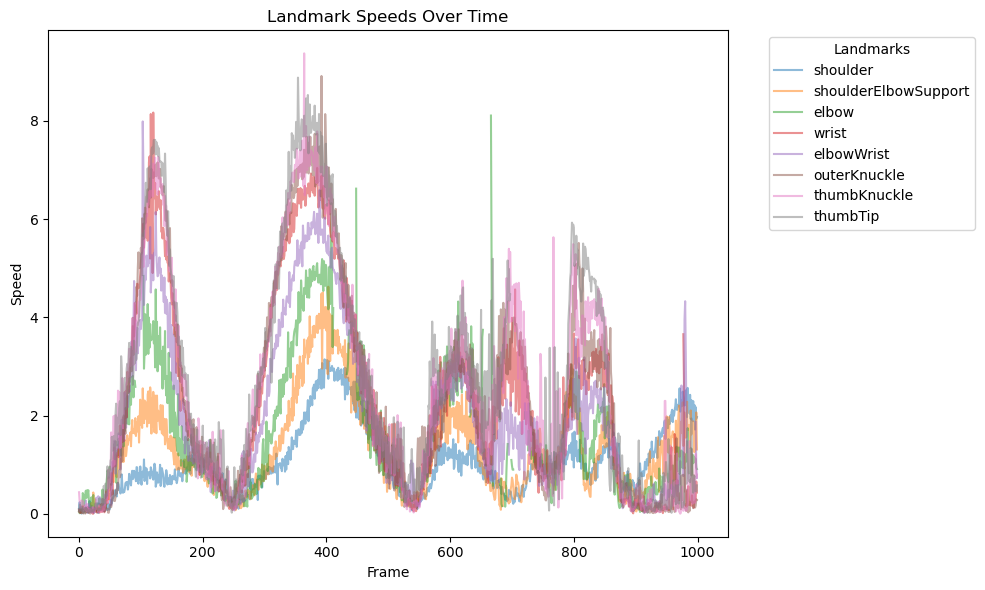

In [38]:
plt.figure(figsize=(10, 6))
for column in speeds_df.columns:
    plt.plot(speeds_df.index[:visualize_frames_count], speeds_df[column][:visualize_frames_count], label=column, alpha=0.5)

plt.title('Landmark Speeds Over Time')
plt.xlabel('Frame')
plt.ylabel('Speed')
plt.legend(title='Landmarks', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [39]:
def moving_average(data, window_size):
    return data.rolling(window=window_size, min_periods=1, center=True).mean()

# Apply the moving average to each column in the DataFrame
window_size = 500  # Adjust the window size as needed
smoothed_speeds_df = speeds_df.apply(moving_average, window_size=window_size)

In [40]:
smoothed_speeds_df

,shoulder,shoulderElbowSupport,elbow,wrist,elbowWrist,outerKnuckle,thumbKnuckle,thumbTip
0,0.611383,1.007354,1.403593,2.252389,1.919219,2.341776,2.436595,2.565660
1,0.609604,1.004089,1.399088,2.244798,1.912490,2.332838,2.427642,2.556722
2,0.607807,1.000710,1.394524,2.237040,1.905172,2.324513,2.419192,2.550340
3,0.606008,0.998130,1.389809,2.229151,1.899092,2.317481,2.410000,2.540998
4,0.604003,0.994494,1.386848,2.221882,1.892530,2.310738,2.401147,2.532491
...,...,...,...,...,...,...,...,...
23323,1.044892,0.965225,0.849319,1.037538,0.957338,1.137414,1.107551,1.201954
23324,1.041612,0.958812,0.849319,1.019640,0.943455,1.117924,1.089686,1.183875
23325,1.037953,0.950377,0.849319,1.003770,0.928940,1.097824,1.070842,1.162667
23326,1.034935,0.944361,0.835485,0.986384,0.912503,1.076163,1.052994,1.144288


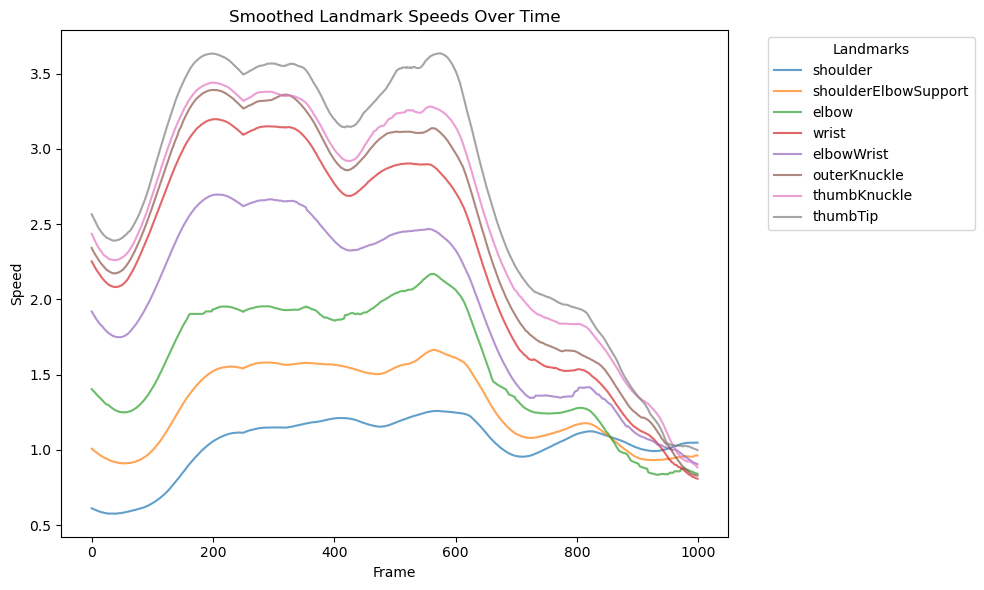

In [41]:
# Plotting smoothed speeds with transparency
plt.figure(figsize=(10, 6))
for column in smoothed_speeds_df.columns:
    plt.plot(smoothed_speeds_df.index[:visualize_frames_count], smoothed_speeds_df[column][:visualize_frames_count], label=column, alpha=0.7)  # Adjust alpha for transparency

plt.title('Smoothed Landmark Speeds Over Time')
plt.xlabel('Frame')
plt.ylabel('Speed')
plt.legend(title='Landmarks', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

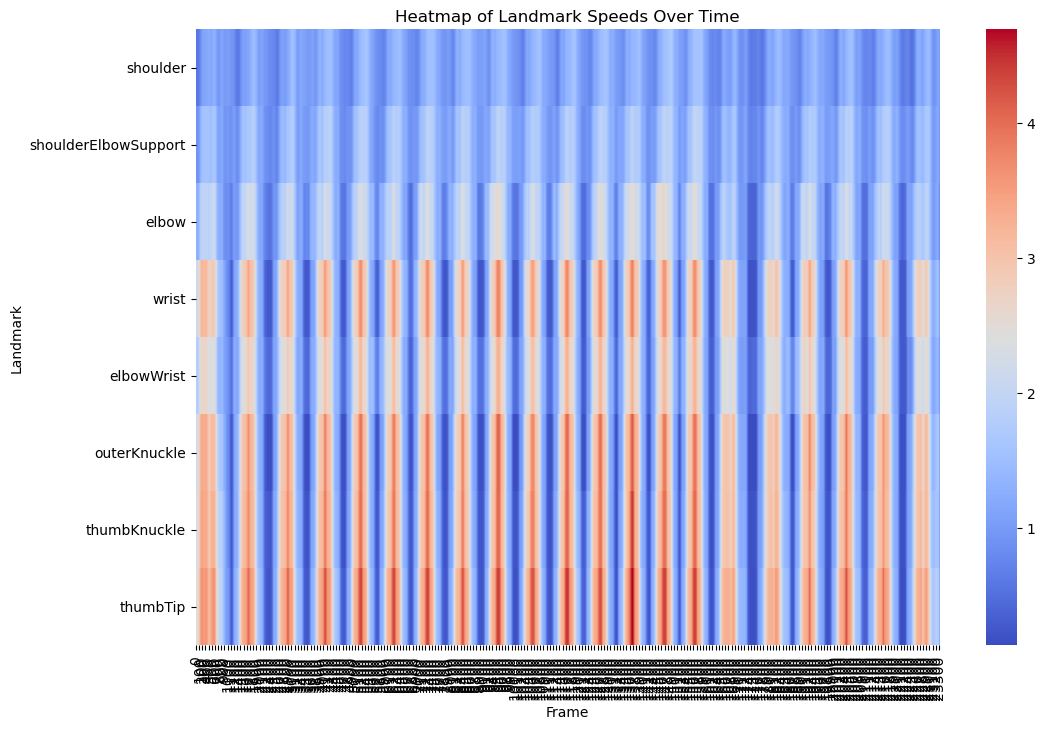

In [42]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(smoothed_speeds_df.T, cmap='coolwarm', cbar=True, xticklabels=100, yticklabels=True)  # xticklabels=100 for showing every 100th label
plt.title('Heatmap of Landmark Speeds Over Time')
plt.xlabel('Frame')
plt.ylabel('Landmark')
plt.show()

In [43]:
trajectories = tables_dict["Trajectories"]

In [44]:
import pandas as pd
import numpy as np

def read_and_process_data(file_path):
    # Load data
    data = pd.read_csv(file_path)

    # Calculate differences between consecutive frames for all columns except 'Frame' and 'Sub Frame'
    position_columns = [col for col in data.columns if col not in ['Frame', 'Sub Frame']]
    differences = data[position_columns].diff().abs()

    # Identify outliers using the IQR method
    Q1 = differences.quantile(0.25)
    Q3 = differences.quantile(0.75)
    IQR = Q3 - Q1
    outlier_threshold = Q3 + 1.5 * IQR

    # Create a mask for outliers
    outliers = (differences > outlier_threshold)

    # Interpolate outliers
    for col in position_columns:
        # Interpolating only the outliers
        data.loc[outliers[col], col] = np.nan
        data[col] = data[col].interpolate(method='linear')

    return data

# Usage
processed_data = read_and_process_data('csv/Trajectories.csv')
processed_data.to_csv('csv/processed_Trajectories.csv', index=False)


In [45]:
import numpy as np
import pandas as pd

def extract_features(data):
    features = pd.DataFrame()
    features['mean_x'] = data['X'].mean(axis=1)
    features['std_x']  = data['X'].std(axis=1)
    features['max_x']  = data['X'].max(axis=1)
    features['min_x']  = data['X'].min(axis=1)
    features['range_x'] = features['max_x'] - features['min_x']
    # Add more features for Y, Z and other dimensions or calculations
    return features

# Apply feature extraction
features = extract_features(processed_data)


KeyError: 'X'